# The Battle of Neighborhood - Business Problem, Methedology and Result

## Project: Starting Online Food Delivery service in New York city 
A capstone project by Pankaj Kumar

### Introduction 
In today's fast-paced and busy life in New York, it is unfeasible to go out and have three times meals in restaurants. Hence, online food delivery service will be best way to save their time and people can dedicate more time in their productive work/ Apart from that, they will have food from their favorite place of their taste and save money as well. Moreover, the online delivery service growing in New York city as forecasted by many agencies. Some of the facts are as follows:
Revenue in the Online Food Delivery segment amounts to US$18,358m in 2019.
Revenue is expected to show an annual growth rate (CAGR 2019-2023) of 7.3%, resulting in a market volume of US$24,345m by 2023.
The market's largest segment is Restaurant-to-Consumer Delivery with a market volume of US$16,162m in 2019.
In global comparison, most revenue is generated in China (US$38,411m in 2019).

https://www.statista.com


### Description of Data 
As mentioned previously, the goal of this study is to determine what are the location we are going to target. We will mostly target the business area where most of the office work happened. The cluster of locations will be identified so that we can provide quick service. We will divide New-York locations into 4 cluster to provide the fastest service. We will use New-York and neighborhood location data for this. The population data is acquired from city of New York website [2]. Apart from the mentioned data, the geospatial data for the neighborhoods in New-York is also imported from Foursquare API to generate a sense of distance between the neighbourhoods [3]. 
https://foursquare.com/ 


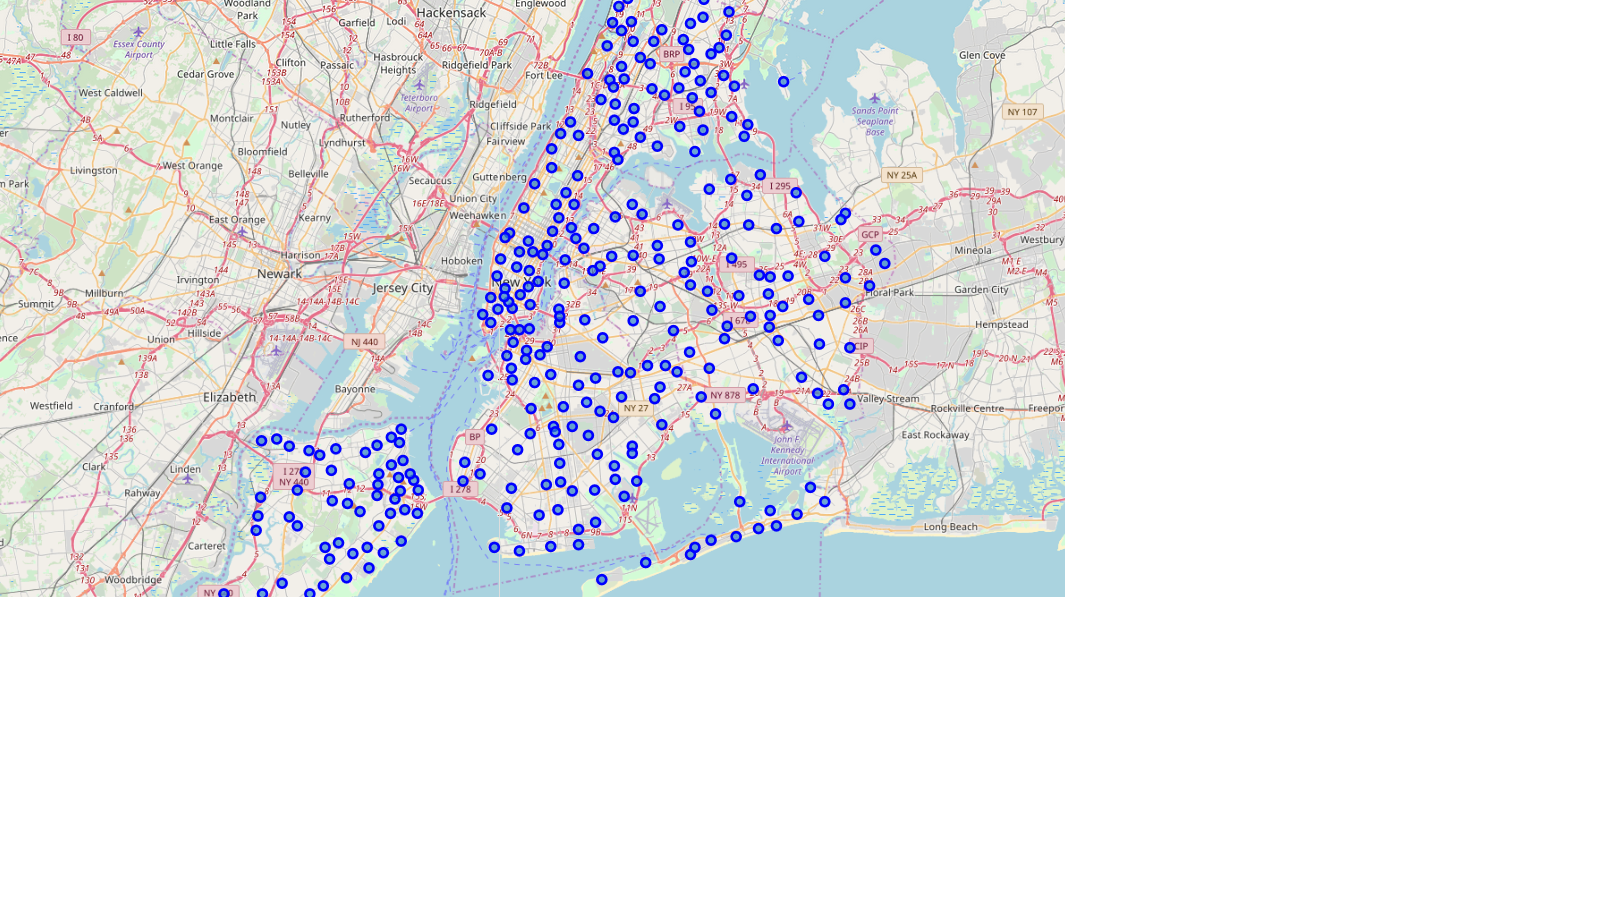

In [4]:
from IPython.display import Image
Image(filename='C:/Users/IBM_ADMIN/Documents/Personal/Pankaj/Courses/Coursera/Applied Data Science Capstone/Neighbourhood.png')

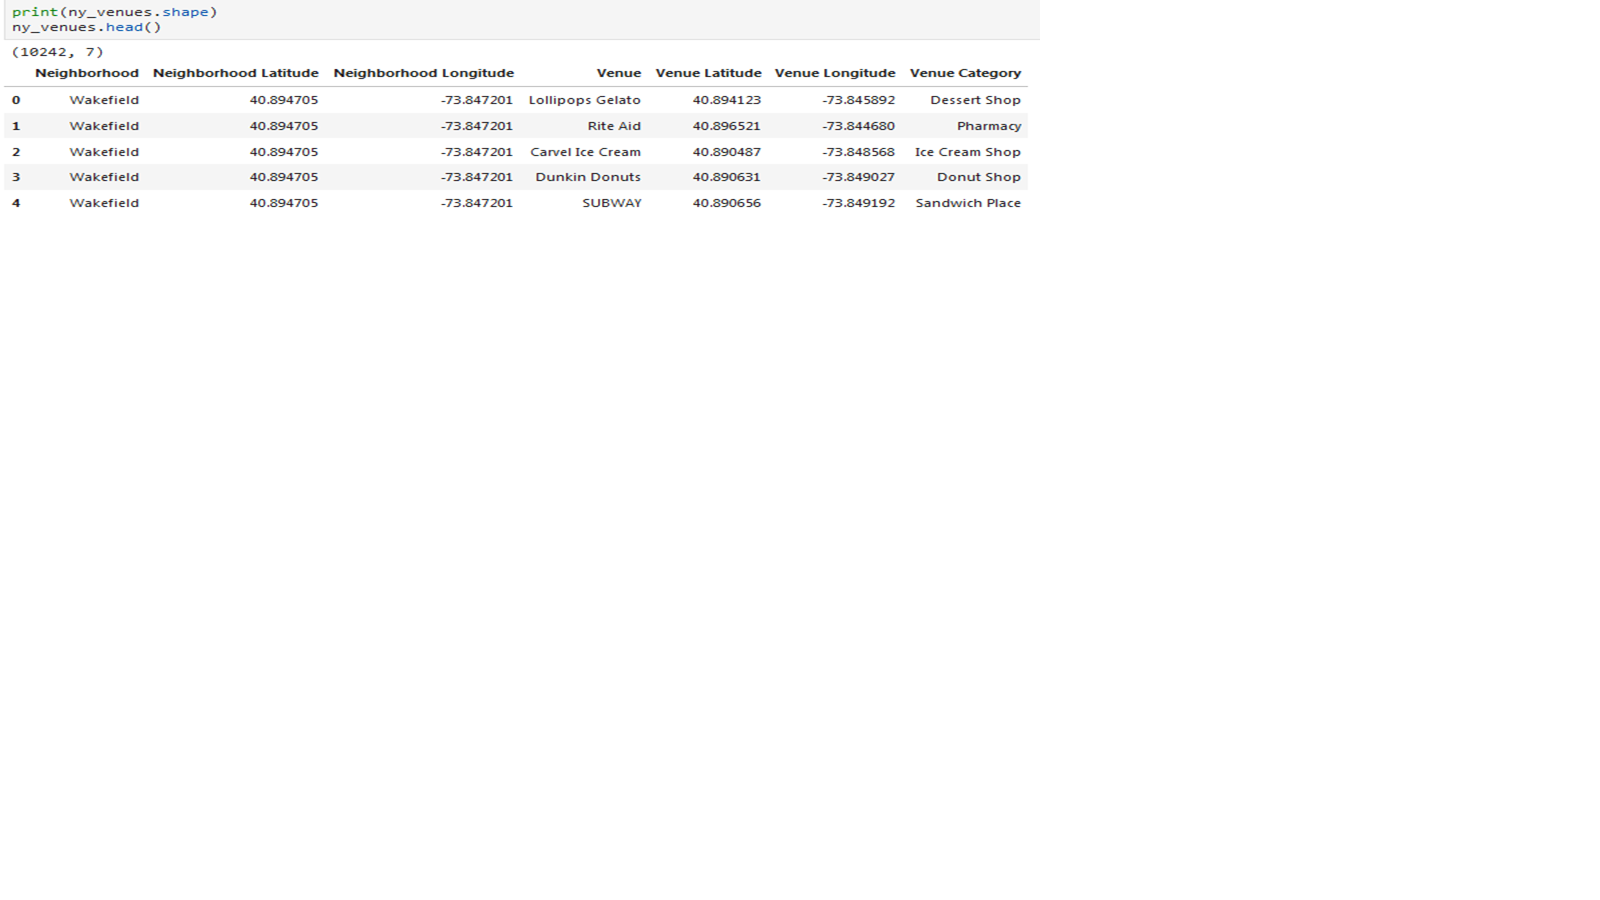

In [5]:
from IPython.display import Image
Image(filename='C:/Users/IBM_ADMIN/Documents/Personal/Pankaj/Courses/Coursera/Applied Data Science Capstone/data.png')

### Methodology 
Once the data from the mentioned data sources are imported and formatted appropriately in a python data frame, the next step is to normalize the data to allow easier comparison between various neighborhoods. Thus, the population (P), number of work places in different neighborhoods in New-York are divided by their maximum values. The next step in the methodology is to cluster the neighborhoods using the k-means algorithm. The clustering of neighborhoods is done only based on geospatial data (i.e. latitude and longitude) and business value. The clustered neighborhoods are visualized using Folium library of python.


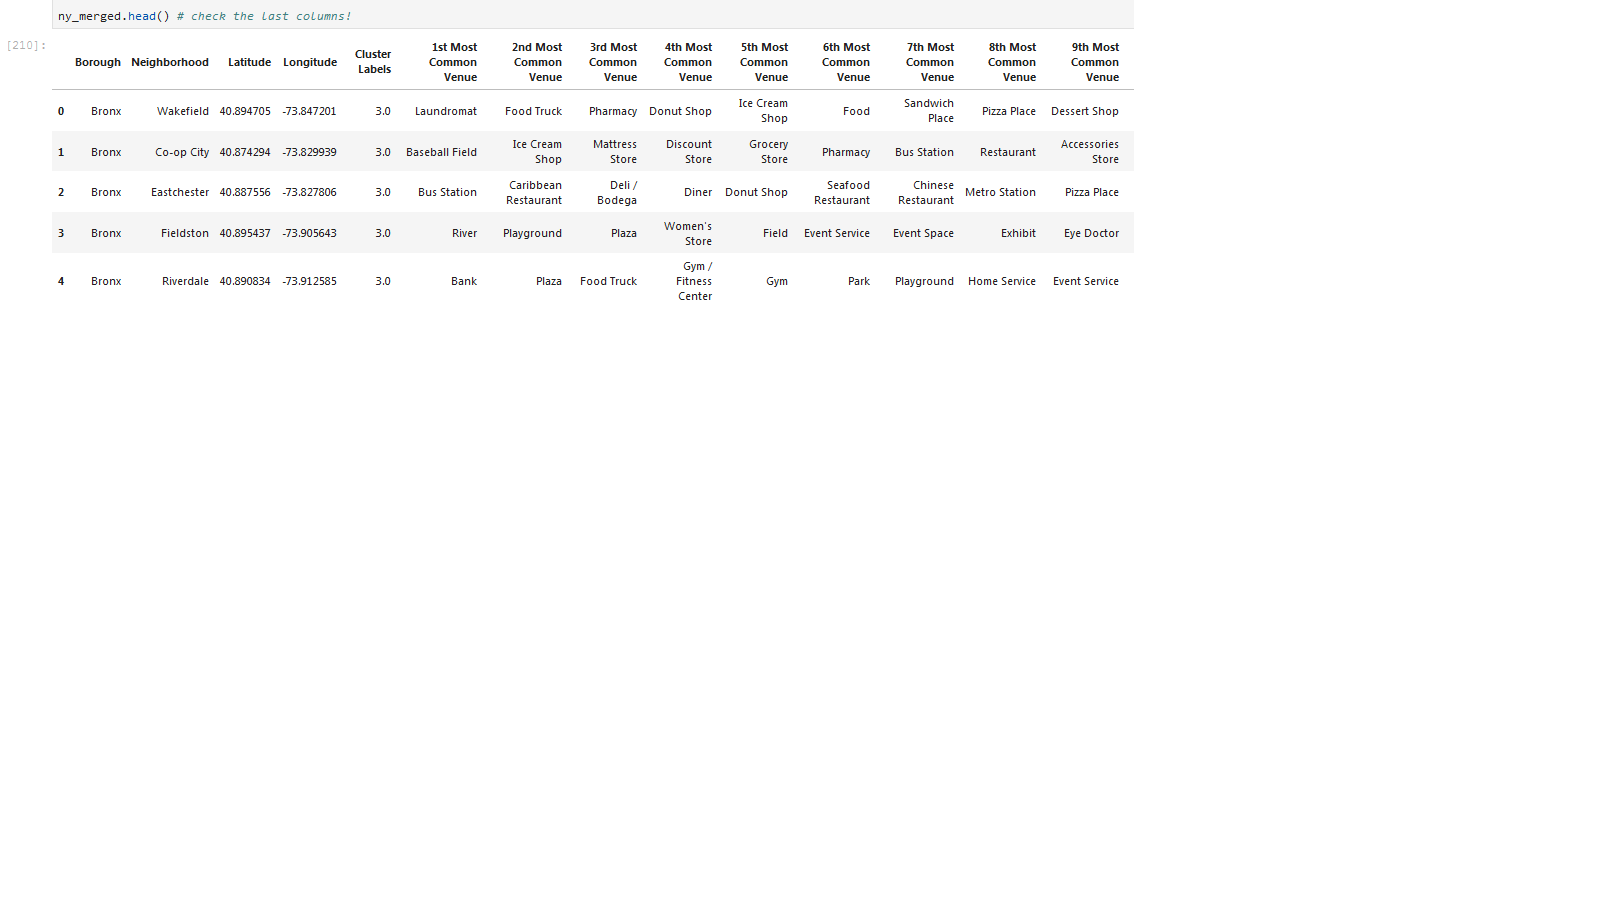

In [6]:
from IPython.display import Image
Image(filename='C:/Users/IBM_ADMIN/Documents/Personal/Pankaj/Courses/Coursera/Applied Data Science Capstone/K-Mean.png')

### Results 
By applying the mentioned methodology, the neighborhoods are clustered in 4 groups. That will cover whole city of New-York based on the clustering method (Euclidean distance) 


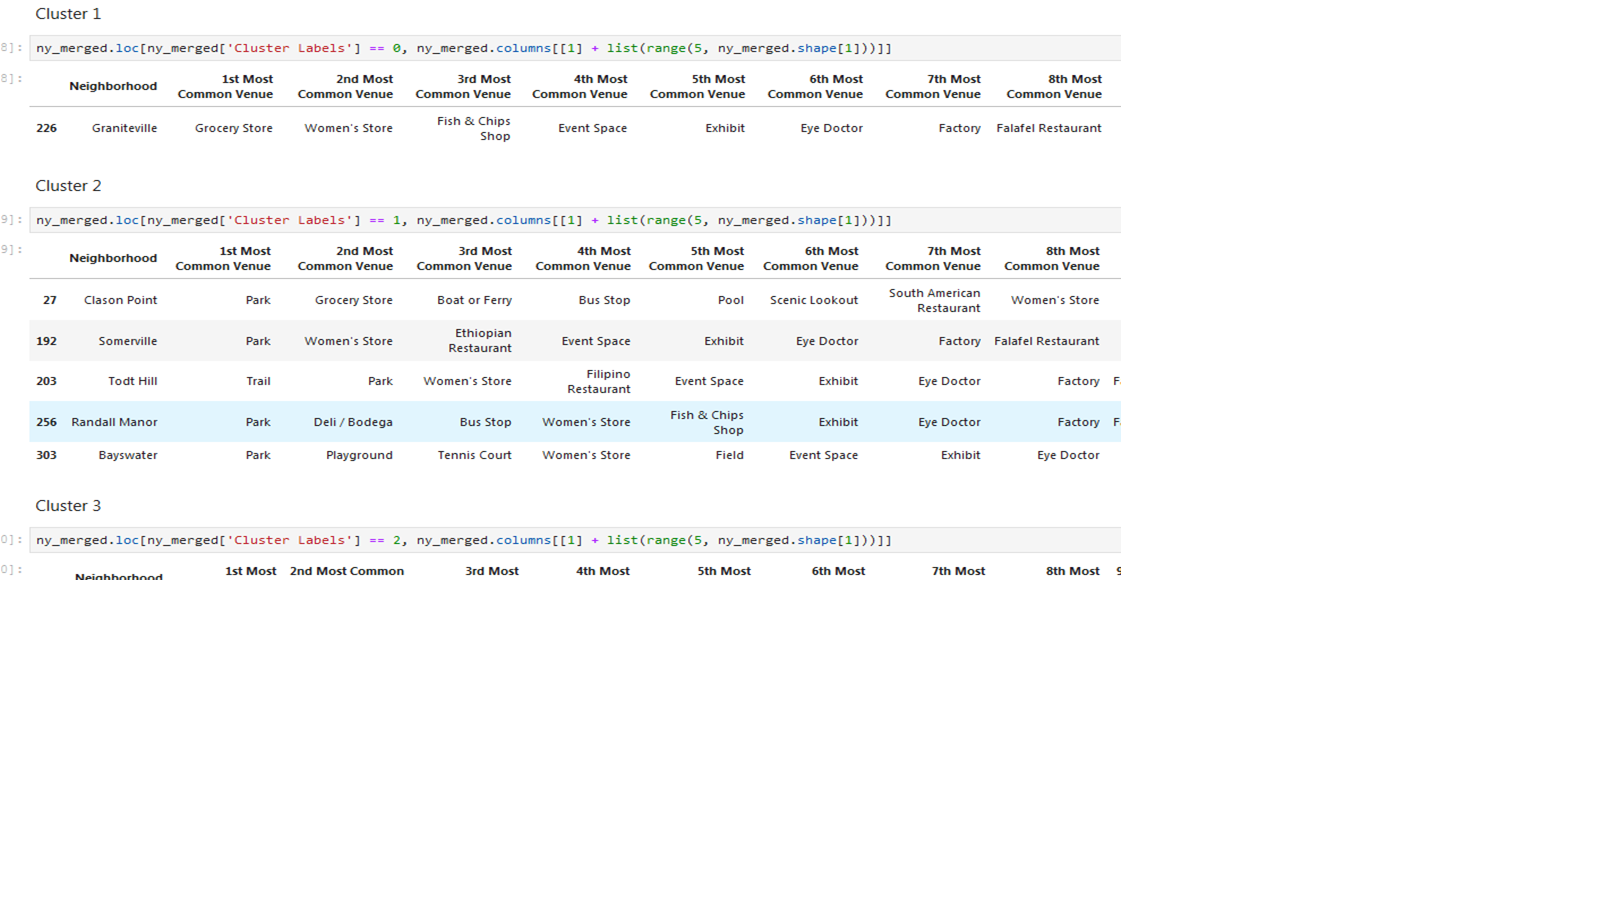

In [8]:
from IPython.display import Image
Image(filename='C:/Users/IBM_ADMIN/Documents/Personal/Pankaj/Courses/Coursera/Applied Data Science Capstone/K-Mean cluster.png')

### Conclusion 
To conclude, the capstone project consisting of Population data collection/wrangling, foursquare API data collection/wrangling, K-means clustering, and folium map visualization is successful in attaining the required goal. The project can be improved by using recent data and including various other parameters such as commercial rents, utility costs etc. The approach of the project can be implemented to address a variety of similar problems such as determining the location for a online delivery service, location of a restaurant etc.


## Project Codes

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

In [ ]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

In [ ]:
!wget -q -O 'newyork_data.json' http://cocl.us/Geospatial_data
print('Data downloaded!')

In [ ]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [ ]:
newyork_data

In [ ]:
neighborhoods_data = newyork_data['features']

In [ ]:
neighborhoods_data[0]

In [ ]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [ ]:
neighborhoods

In [ ]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [ ]:
neighborhoods.head()

In [ ]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

In [ ]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

In [ ]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [ ]:
# Added
CLIENT_ID = 'BRZKRMDSV1E5SRE21E2RSJEIHF1GNYKS0SEK2NGKDKELNILY' # your Foursquare ID
CLIENT_SECRET = 'PTFDKUT453XNBYHGHLUHMHREMP2TYSZ0H001RHAPH4UA55XL' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
search_query = 'Office'
radius = 500
print(search_query + ' .... ')

In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

In [ ]:
results = requests.get(url).json()
results

In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

In [ ]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

In [ ]:
ny_data = neighborhoods
ny_data.head()

In [ ]:
# create map of Manhattan using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ny_data['Latitude'], ny_data['Longitude'], ny_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

In [ ]:
ny_data.loc[0, 'Neighborhood']


neighborhood_latitude = ny_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = ny_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = ny_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))



In [ ]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

In [ ]:
results = requests.get(url).json()
results

In [ ]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


# Now we are ready to clean the json and structure it into a *pandas* dataframe.

# In[150]:


venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


# And how many venues were returned by Foursquare?

# In[151]:


print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [ ]:
ny_venues = getNearbyVenues(names=ny_data['Neighborhood'],
                                   latitudes=ny_data['Latitude'],
                                   longitudes=ny_data['Longitude']
                                  )



In [ ]:
print(ny_venues.shape)
ny_venues.head()

ny_venues.groupby('Neighborhood').count()


In [ ]:
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

In [ ]:
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()


In [ ]:
ny_onehot.shape

ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped


In [ ]:
ny_grouped.shape
num_top_venues = 5

for hood in ny_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ny_grouped[ny_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


# In[82]:


num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# Now let's create the new dataframe and display the top 10 venues for each neighborhood.

# In[208]:


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


In [ ]:
# set number of clusters
kclusters = 4

ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ny_merged = ny_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ny_merged = ny_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ny_merged.head() # check the last columns!

In [ ]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [ ]:
# #### Cluster 1

ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [ ]:
# #### Cluster 2

ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [ ]:

# #### Cluster 3

ny_merged.loc[ny_merged['Cluster Labels'] == 2, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [ ]:
# #### Cluster 4

ny_merged.loc[ny_merged['Cluster Labels'] == 3, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]